In [27]:
import torch
from transformers import BartTokenizer, BartForSequenceClassification, DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from bertviz import head_view
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Example text
premise = "A soccer game with multiple males playing"
hypothesis = "Some men are playing a sport"

In [29]:
def tokenize_input(model, tokenizer):
    # Tokenize input
    inputs = tokenizer.encode_plus(premise, hypothesis, return_tensors='pt')
    input_ids = inputs['input_ids']
    return model(input_ids)[-1], input_ids  # Get the attention scores

In [30]:
def head(model, tokenizer):
    model_attention, input_ids = tokenize_input(model, tokenizer)
    # Visualize attention
    model_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    return model_attention, model_tokens

In [31]:
def attention_map(model, tokenizer):
    model_attention, input_ids = tokenize_input(model, tokenizer)
    # Get the attention from the last layer, first head
    attention_scores = model_attention[-1][0][0].detach().numpy()
    
    # Clean tokens
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    cleaned_tokens = [token.replace('Ġ', '') for token in tokens]
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_scores, xticklabels=cleaned_tokens, yticklabels=cleaned_tokens, cmap='viridis')
    plt.title('Attention Heatmap')
    plt.show()

In [32]:
bart = "facebook/bart-large-mnli"
bart_tokenizer = BartTokenizer.from_pretrained(bart)
bart_model = BartForSequenceClassification.from_pretrained(bart, output_attentions=True, attn_implementation="eager")
attention, tokens = head(bart_model, bart_tokenizer)
head_view(attention, tokens)

<IPython.core.display.Javascript object>

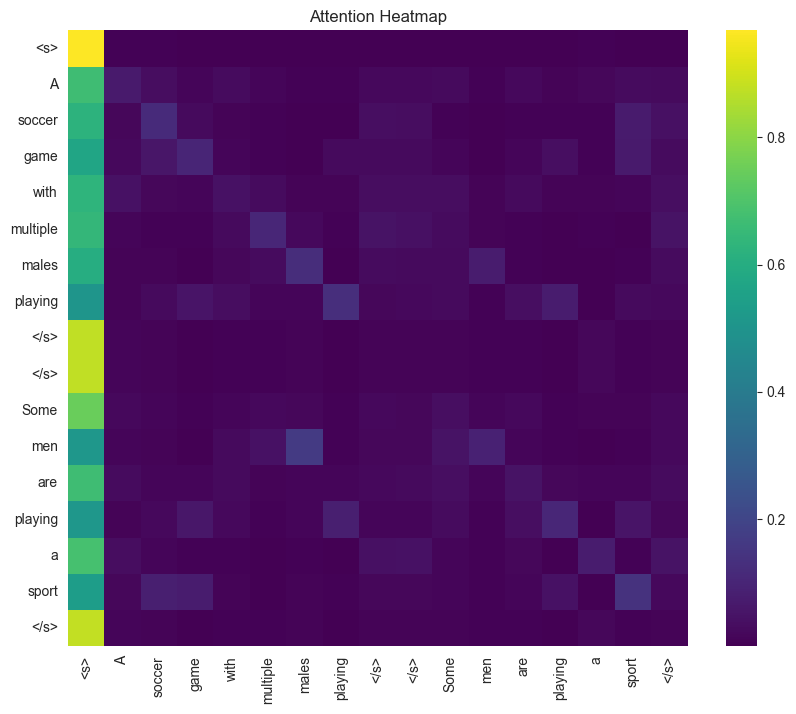

In [33]:
attention_map(bart_model, bart_tokenizer)

In [34]:
deberta = "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli"
deberta_tokenizer = DebertaV2Tokenizer.from_pretrained(deberta)
deberta_model = DebertaV2ForSequenceClassification.from_pretrained(deberta, output_attentions=True)
attention, tokens = head(deberta_model, deberta_tokenizer)
head_view(attention, tokens)

<IPython.core.display.Javascript object>

D:\Thesis\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9601 (\N{LOWER ONE EIGHTH BLOCK}) missing from current font.
  fig.canvas.draw()
D:\Thesis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9601 (\N{LOWER ONE EIGHTH BLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


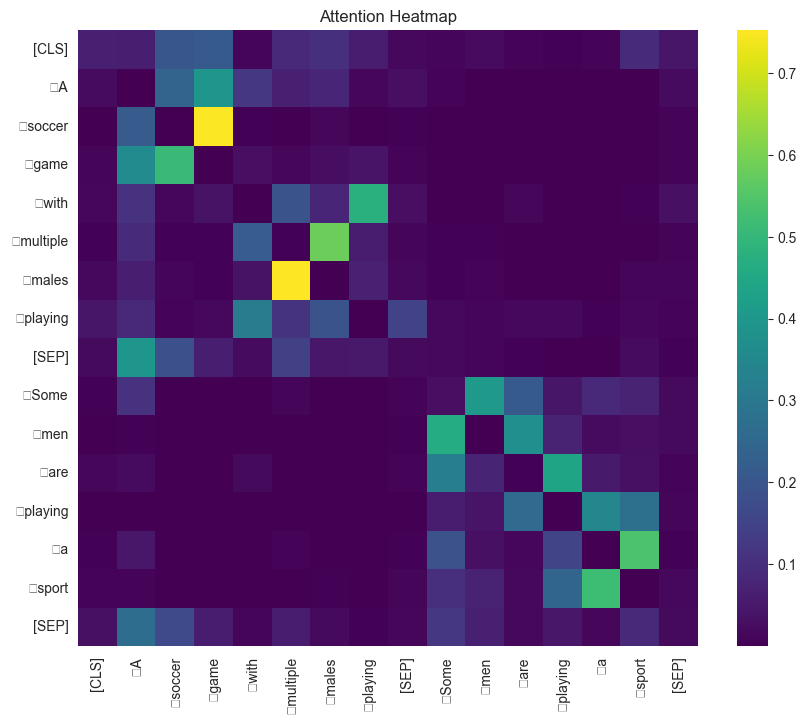

In [35]:
attention_map(deberta_model, deberta_tokenizer)
